In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd 
import numpy as np

from pca import pca

## 1. PCA的例子

In [2]:
# Load dataset
data = datasets.load_wine()
X = data.data
y = data.target
col_labels = data.feature_names


df = pd.DataFrame(X, columns=col_labels)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [1]:
#In general it is a good idea to scale the data
# scaler = StandardScaler(with_mean=True, with_std=True)
# X = scaler.fit_transform(X)
# pd.DataFrame(X)

In [3]:
# Initialize pca with default parameters
model = pca(normalize=True)

# Fit transform
results = model.fit_transform(df) 

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [13] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [10] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


(<Figure size 1500x1000 with 1 Axes>,
 <AxesSubplot: title={'center': 'Cumulative explained variance\n 10 Principal Components explain [97.90%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

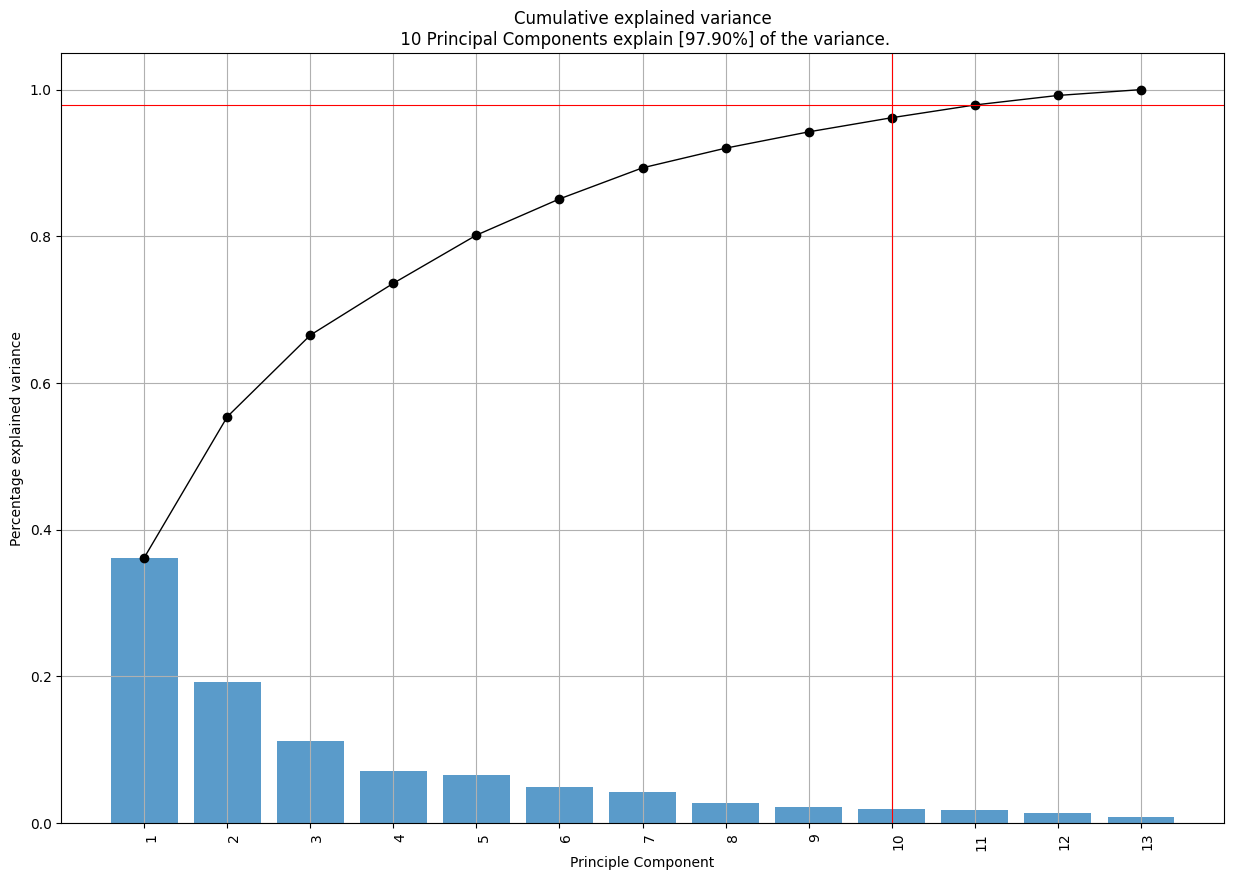

In [4]:
# Plot the explained variance
model.plot()

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '10 Principal Components explain [97.90%] of the variance'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

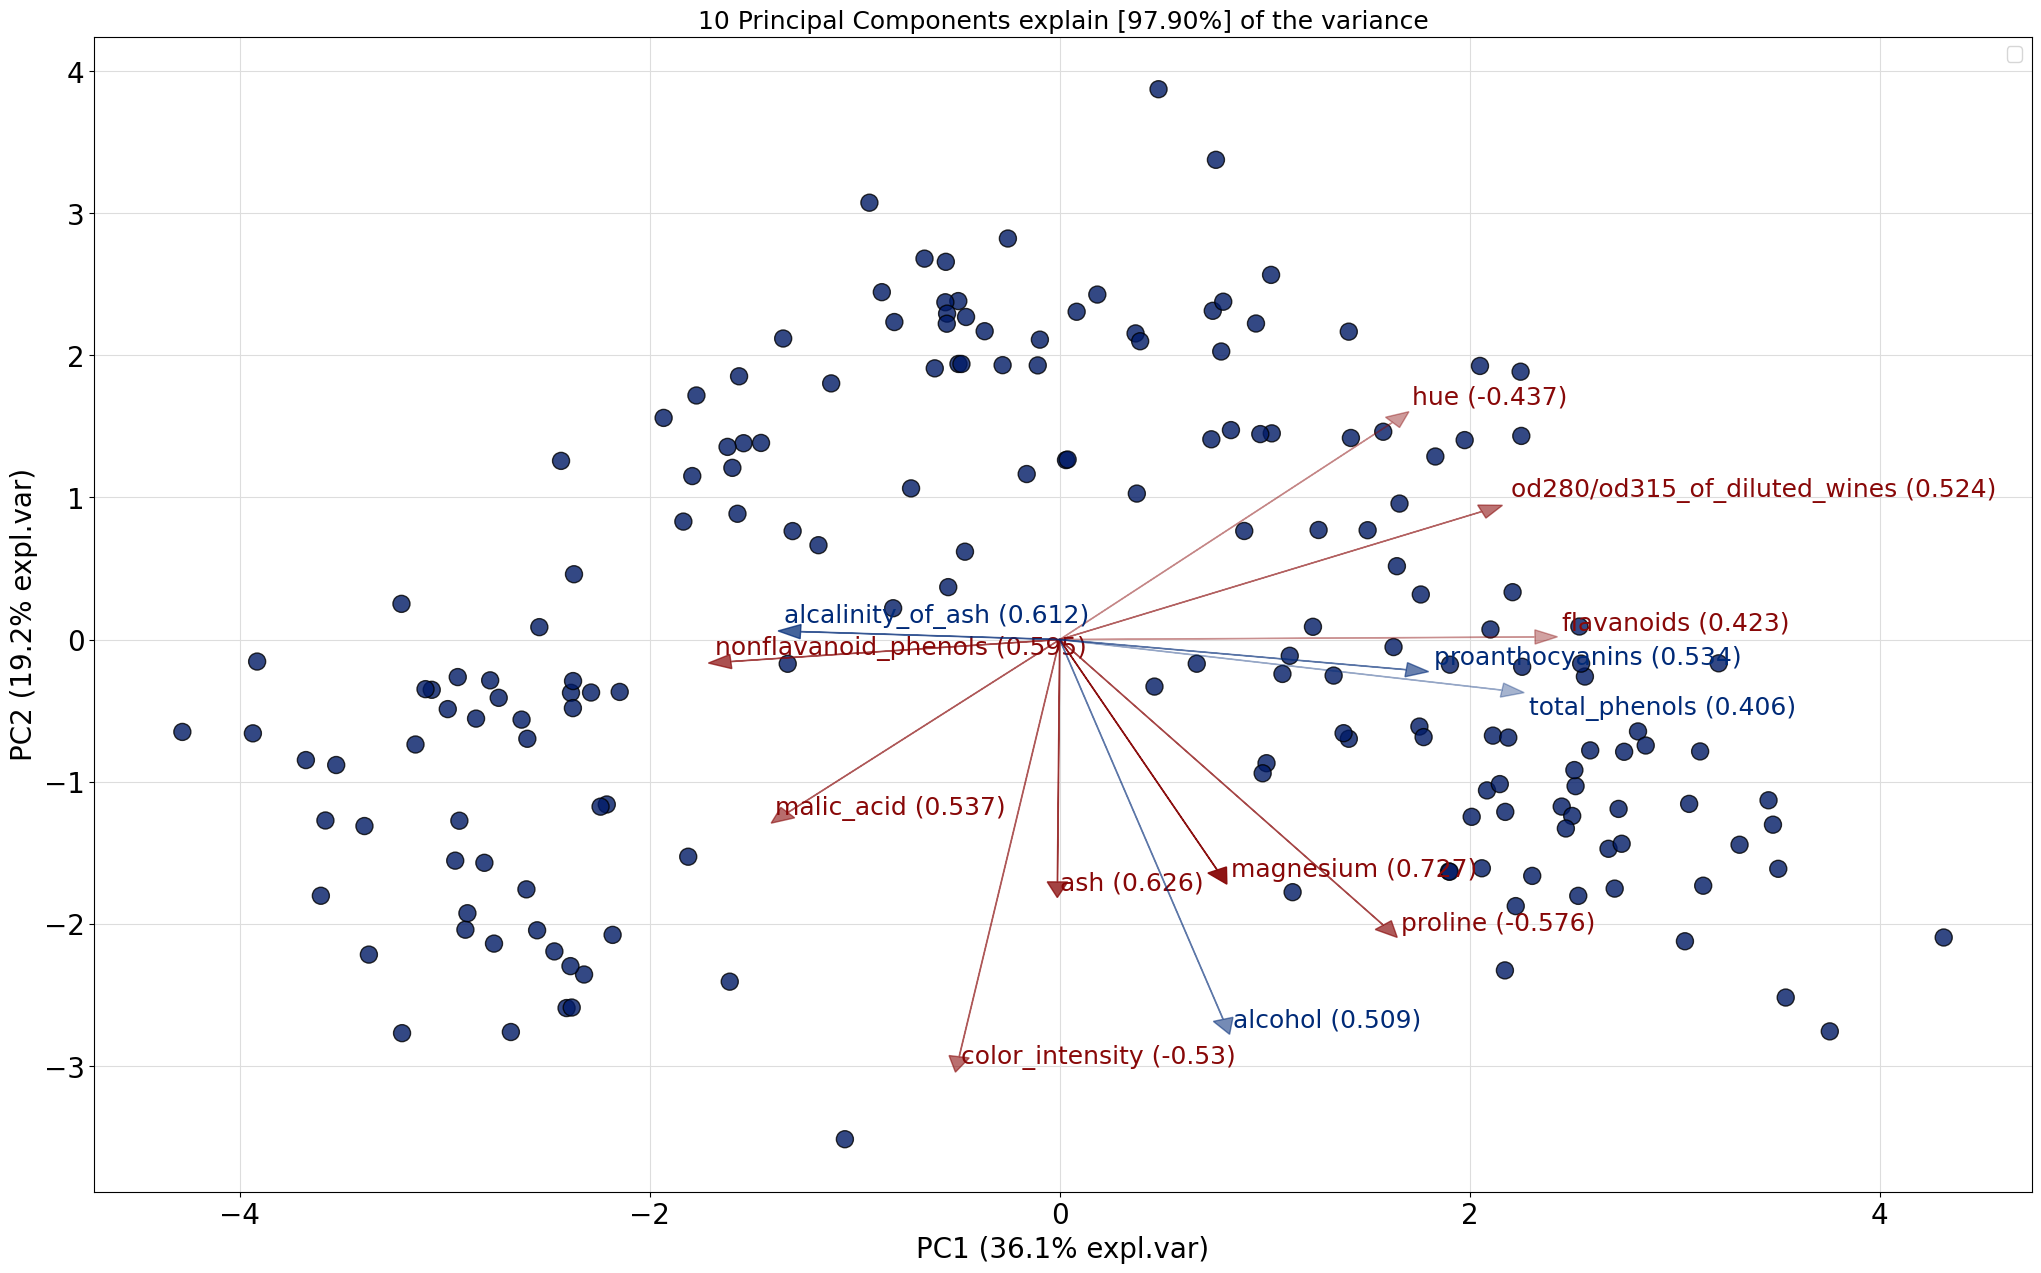

In [5]:
# Scatter plot with loadings
model.biplot()

In [9]:
model.results['outliers']

,y_proba,p_raw,y_score,y_bool,y_bool_spe,y_score_spe
0,0.982875,0.376726,21.351215,False,False,3.617239
1,0.982875,0.624371,17.438087,False,False,2.234477
2,0.982875,0.589438,17.969195,False,False,2.719789
3,0.982875,0.134454,27.028857,False,False,4.659735
4,0.982875,0.883264,12.861094,False,False,1.332104
...,...,...,...,...,...,...
173,0.982875,0.147396,26.583414,False,False,4.033903
174,0.982875,0.771408,15.087004,False,False,3.139750
175,0.982875,0.244157,23.959708,False,False,3.846217
176,0.982875,0.333600,22.128104,False,False,3.312952


[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '10 Principal Components explain [97.90%] of the variance'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

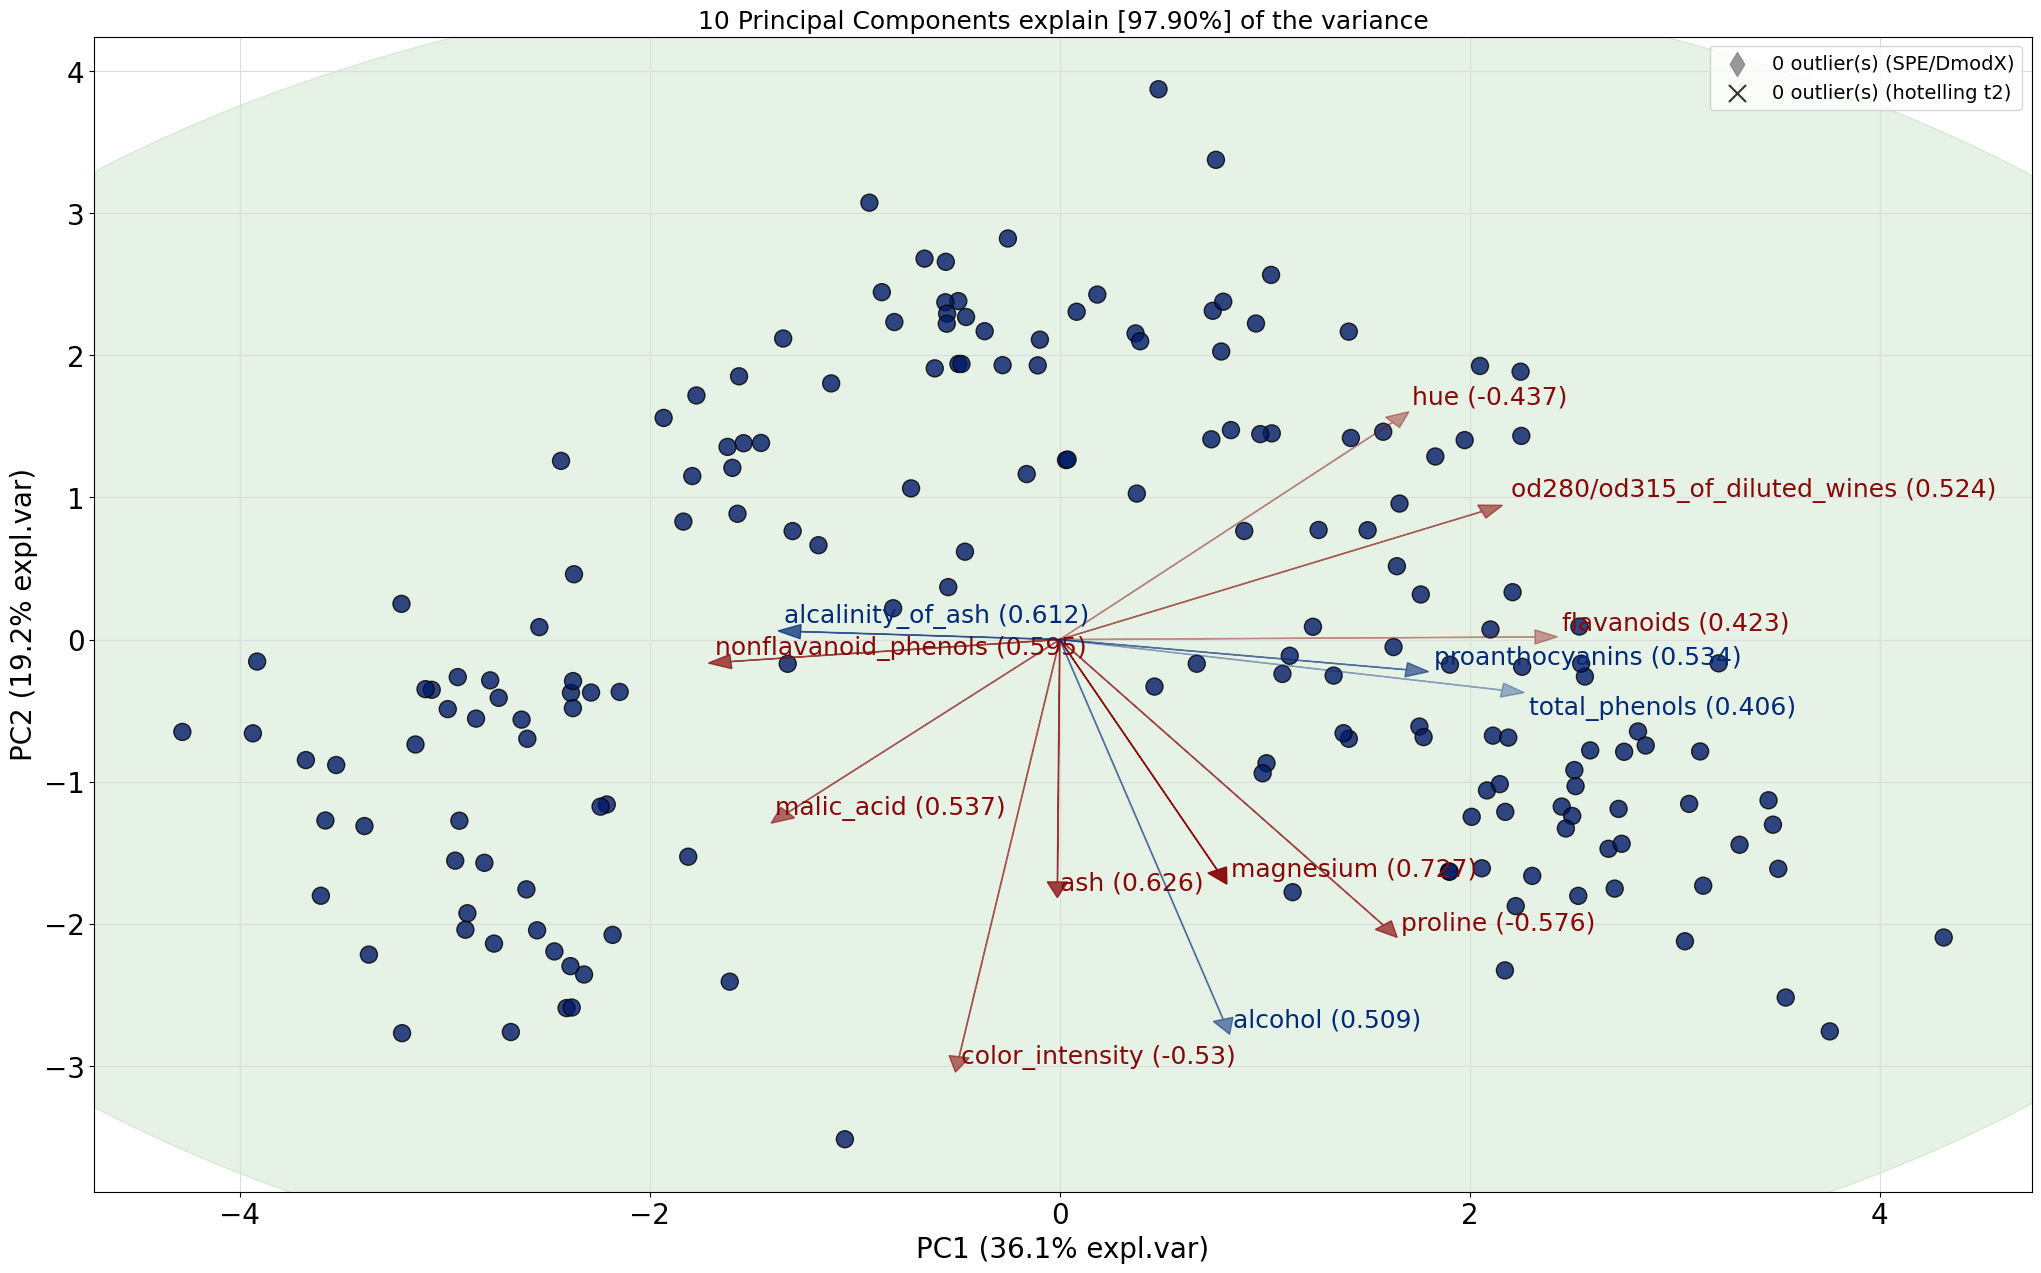

In [46]:
model.biplot(legend=True, SPE=True, HT2=True)

[datazets] >WARNING> No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '10 Principal Components explain [97.90%] of the variance'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)', zlabel='PC3 (11.1% expl.var)'>)

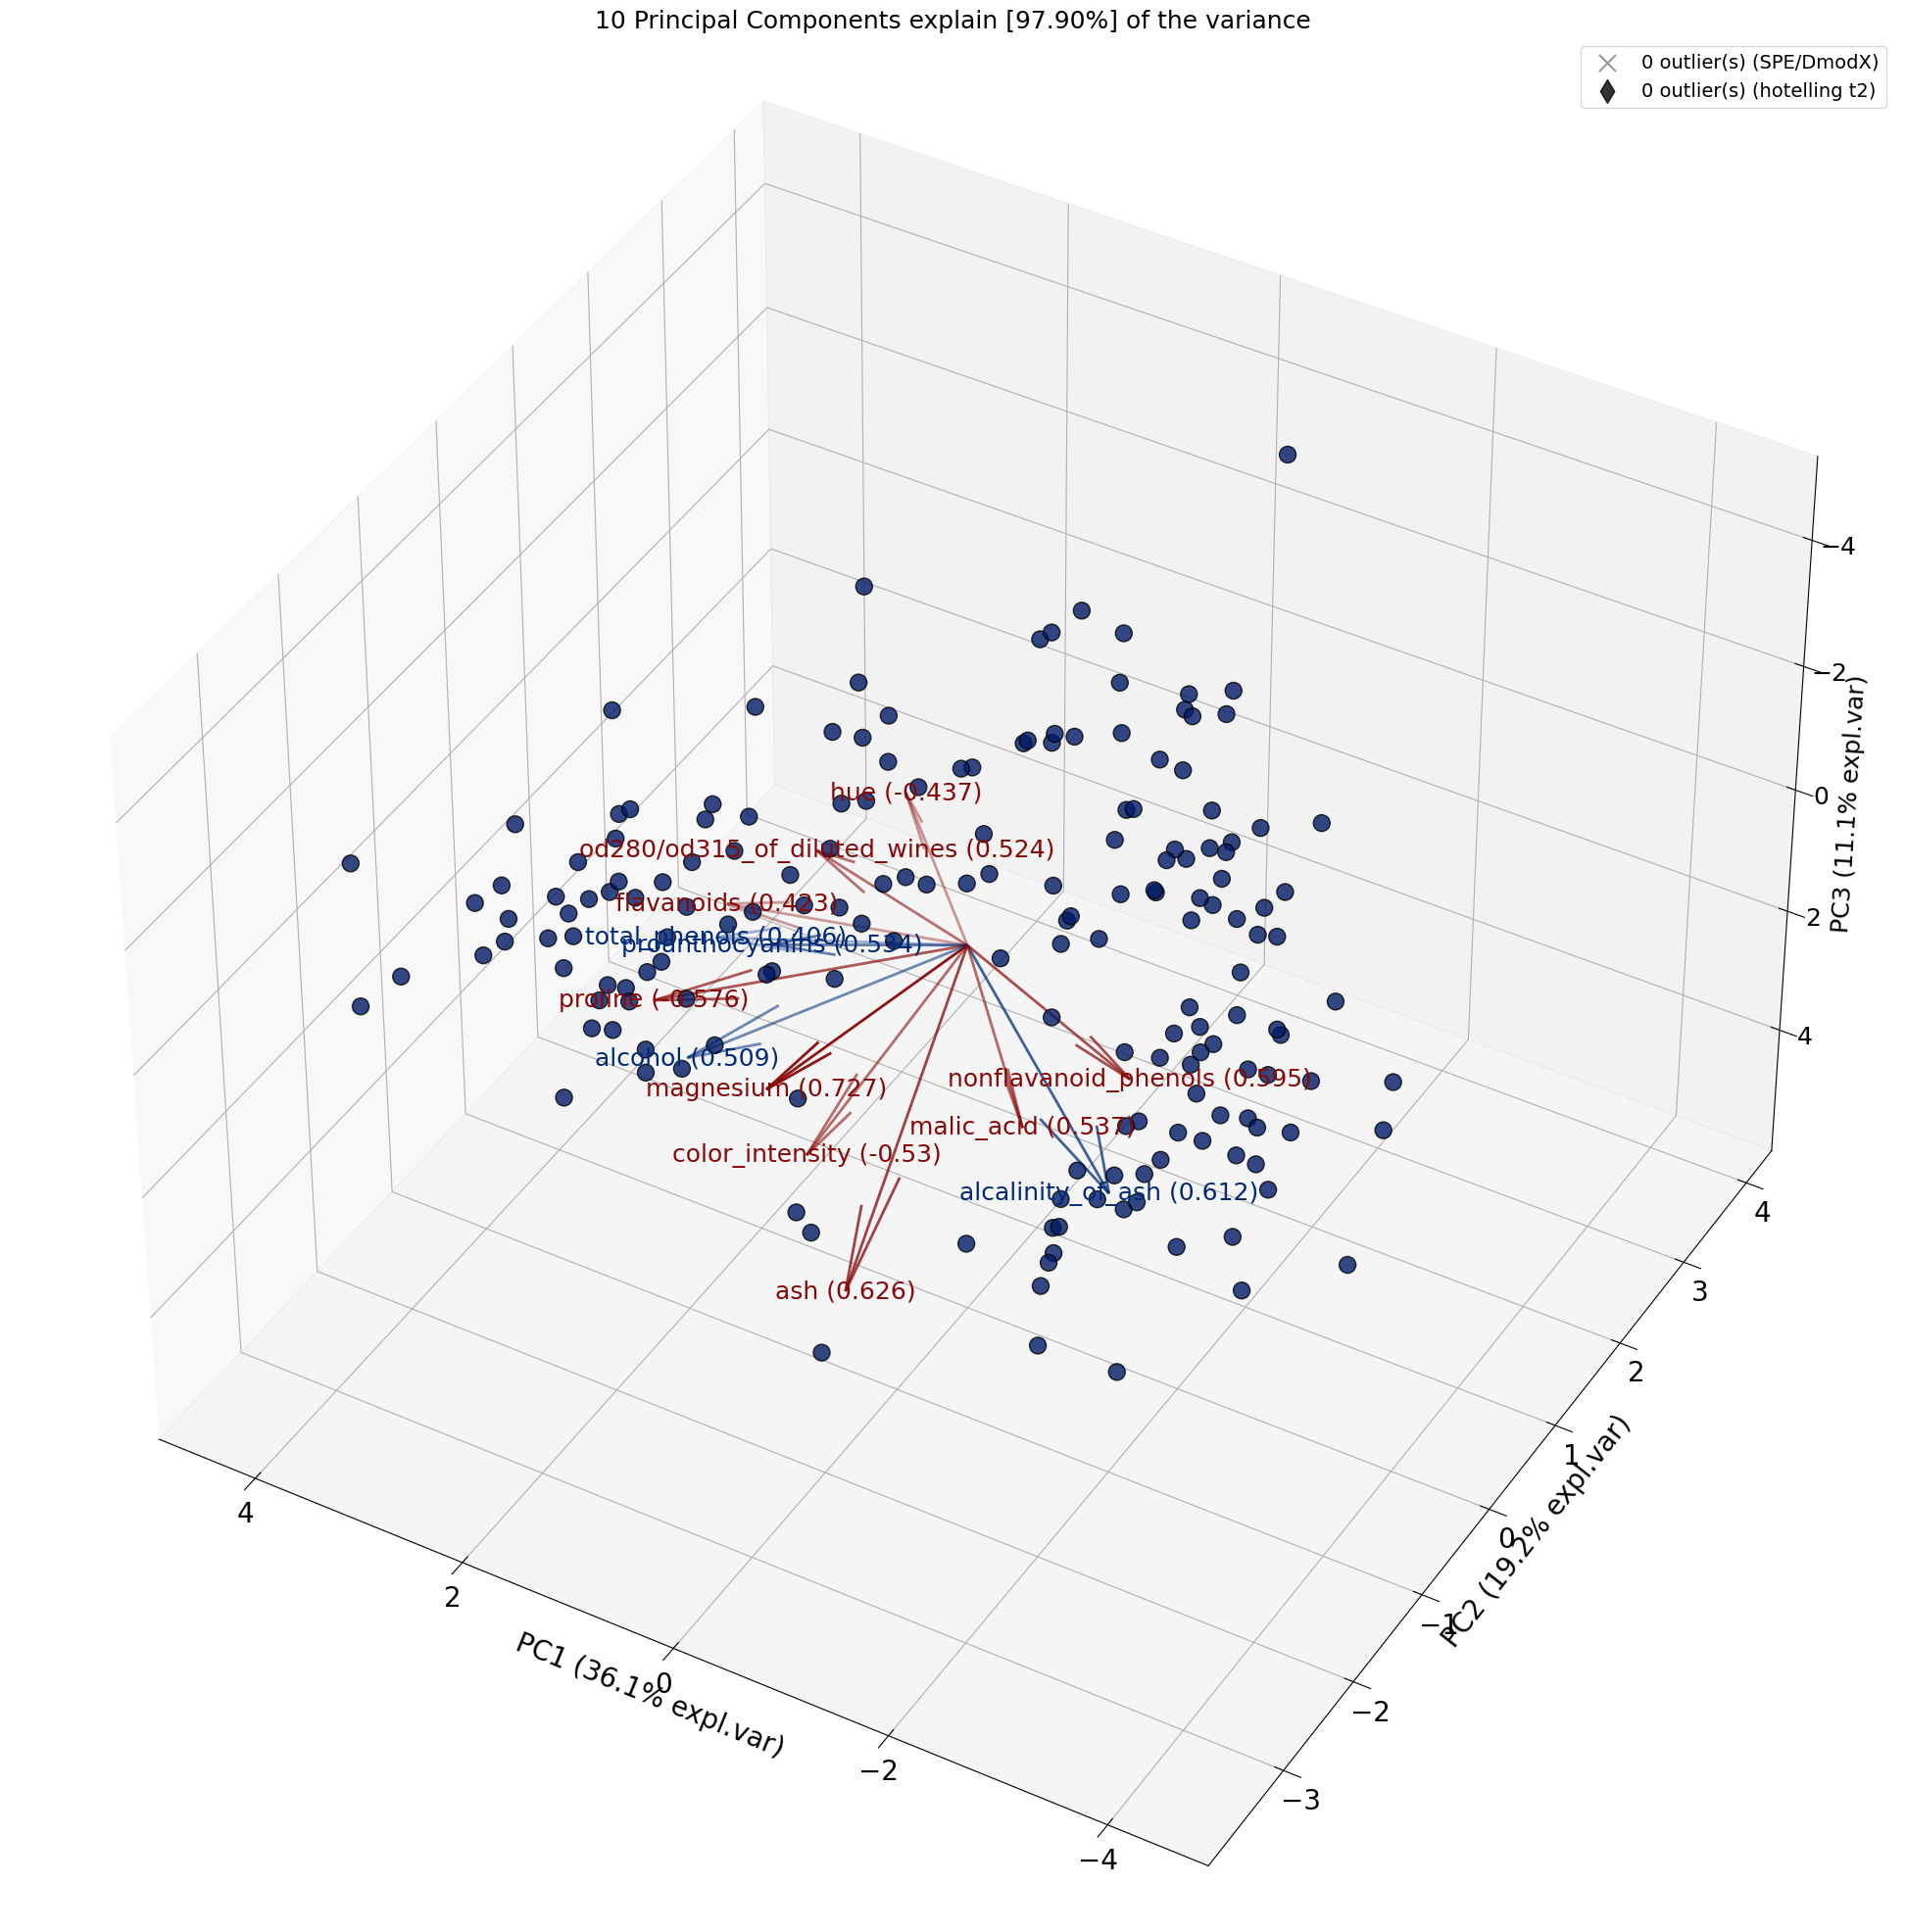

In [8]:
model.biplot3d(legend=True, SPE=True, HT2=True)

In [16]:
loadings = model.results['loadings']
loadings

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
PC9,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
PC10,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


In [17]:
def square_sum(series):
    return sum(series**2)

# 每一个PC的载荷，平方后求和都为1
loadings.apply(lambda x: square_sum(x), axis=1)

PC1     1.0
PC2     1.0
PC3     1.0
PC4     1.0
PC5     1.0
PC6     1.0
PC7     1.0
PC8     1.0
PC9     1.0
PC10    1.0
dtype: float64

In [18]:
# 每一个PC中最好的feature
model.results['topfeat']

,PC,feature,loading,type
0,PC1,flavanoids,0.422934,best
1,PC2,color_intensity,-0.529996,best
2,PC3,ash,0.626224,best
3,PC4,malic_acid,0.536890,best
4,PC5,magnesium,0.727049,best
5,PC6,malic_acid,-0.536814,best
6,PC7,nonflavanoid_phenols,0.595447,best
7,PC8,hue,-0.436624,best
8,PC9,proline,-0.575786,best
9,PC10,od280/od315_of_diluted_wines,0.523706,best


In [47]:
# 降维后的数据： pd.DataFrame(X @ loadings.values.T)   做PCA时的数据是标准化后的，所以这里的X也需要标准化
scaler = StandardScaler()
X1 = scaler.fit_transform(df)

pd.DataFrame(X1 @ loadings.values.T)

,0,1,2,3,4,5,6,7,8,9
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366
...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490


In [48]:
# 降维后的数据：和上面的结果是一样的
model.results['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366
...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490


### 数据介绍

In [1]:
from scipy import stats 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

import plotly.offline as py 
import plotly.graph_objs as go 
from IPython.display import IFrame

In [2]:
data = pd.read_csv('X.csv', index_col=0)   # (105, 5)

data.columns =['sensor_'+str(i+1) for i in range(data.shape[1])]

data

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
0,-1.668427,-1.236568,-0.357626,0.078829,-0.722088
1,0.357000,-0.282781,1.470614,0.895006,-0.692196
2,-0.930076,-0.466598,0.719128,-0.122647,1.303521
3,-0.195852,1.000133,-0.419692,1.338096,0.964969
4,-0.088862,0.412352,1.994721,0.458075,-0.387669
...,...,...,...,...,...
100,5.974836,6.141650,8.719583,6.376262,9.625973
101,6.184956,8.892480,5.544241,8.696452,5.826496
102,6.255391,8.935245,5.200991,6.012425,7.224625
103,8.037152,7.427010,7.647403,7.714116,8.607354


In [4]:
py.init_notebook_mode(connected=True)

column_values = data.columns.values 
time_column =data.index
trace_list = []

for i in  range(len(column_values)):
    data_column = data[column_values[i]]
    trace = go.Scatter(x=time_column, y=data_column, mode='lines', name=column_values[i])
    trace_list.append(trace)

layout= go.Layout(title='模拟数据', xaxis={"title":"105 Samples", 'tickangle':60}, yaxis={"title":"Values"})

fig = go.Figure(trace_list, layout)
fig.show()

## 2. outlier计算

### 2.1 HT2(版本一：Fisher method和multitest用于P值校正)

In [1]:
from pca import pca
from scipy import stats 
import pandas as pd
import numpy as np
import statsmodels.stats.multitest as multitest

In [2]:
# 多重假设检验：P值的BH校正(FDR校正)
def fdr_bh_correction(p_values, alpha=0.05):
    p_test = np.asarray(p_values)

    # 保存从小到大的排序索引：这是原来位置的索引，后续映射会用到
    sorted_indices = np.argsort(p_test)

    # 将P_value按从小到大排序
    p_test_sort = sorted(p_test)

    # 根据BH校正公式计算每个P值校正后的值，并且取累积最小值
    len_p = len(p_test)
    ecdffactor = float(len_p) / np.arange(1, len_p + 1)
    pvals_corrected_raw = p_test_sort * ecdffactor
    pvals_corrected = np.minimum.accumulate(pvals_corrected_raw[::-1])[::-1]

    # 由于上述是将P值从小到大排序后计算，下面需要将这些值映射回原来P值的顺序
    p_test_origin_map = np.empty_like(p_test)
    p_test_origin_map[sorted_indices] = pvals_corrected

    # 和alpha进行比较，小于alpha为True, 认为显著；反之认为不显著
    reject = [True if p_test_origin_map[i] < alpha else False for i in range(len_p)]
    return p_test_origin_map, reject


def Ht2_calculate(X, alpha=0.05):
    X = np.array(X)
    y = X
    mean, var = np.mean(X), np.var(X)

    # 每个数字都计算HT2统计量的值
    y_score = (y - mean) ** 2 / var

    # 计算每个y_score右边的分布函数面积，相当于计算单侧检验的P值
    y_proba = 1 - stats.chi2.cdf(y_score, df=1)
    y_proba[y_proba == 0] = 1e-300

    # 对y_proba进行combine, 每一条样本变成一个P值: 费希尔方法
    Pcomb = []
    for i in range(0, y_proba.shape[0]):
        Pcomb.append(stats.combine_pvalues(y_proba[i, :], method='fisher'))
        
    # 第一列是检验统计量的值，第二列是合并后的P值
    Pcomb = np.array(Pcomb)

    # 对合并后的P值进行校正，常用的方法是fdr-bh校正(多重假设检验)
    Pcorr, _ = fdr_bh_correction(Pcomb[:, 1])
    Pcorr = np.clip(Pcorr, 0, 1)
    res = pd.DataFrame({
        'HT2_statistic': Pcomb[:, 0],
        'Pvalue_raw': Pcomb[:, 1],
        'Pvalue_corrected': Pcorr,
        'y_bool': Pcorr <= alpha
    })
    return res

In [3]:
data = pd.read_csv('X.csv', index_col=0)   # (105, 5)
data.columns =['sensor_'+str(i+1) for i in range(data.shape[1])]


# 划分训练集和测试集
df_train = data.iloc[:90, :]
df_test = data.iloc[90:, :]

In [4]:
model = pca(alpha=0.05, verbose=2, n_components=4)
results = model.fit_transform(df_train)
results

{'loadings':      sensor_1  sensor_2  sensor_3  sensor_4  sensor_5
 PC1  0.088244  0.541901 -0.595816  0.585606  0.025011
 PC2 -0.355909 -0.255025 -0.598464 -0.343879  0.576089
 PC3  0.545523  0.071738 -0.434678 -0.572708 -0.424640
 PC4 -0.342685  0.785840  0.217231 -0.458304  0.088265,
 'PC':          PC1       PC2       PC3       PC4
 0  -0.434000  0.583013 -0.623139 -0.564167
 1  -0.349000 -1.738678 -0.724620 -0.482995
 2  -0.660468  0.715681 -1.377925  0.292915
 3   1.724624  0.064497 -1.069966  0.247190
 4  -0.572175 -1.745240 -1.024880  0.557037
 ..       ...       ...       ...       ...
 85  0.521665  0.686491  0.491907 -1.820739
 86  0.868754 -0.321443 -0.620704 -0.723544
 87  2.169411  2.645331 -0.309904 -1.146228
 88  0.291717  0.528238  0.593641  0.163318
 89  0.794843 -0.803902 -1.194903 -1.657415
 
 [90 rows x 4 columns],
 'explained_var': array([0.24847369, 0.47893452, 0.69350814, 0.85625448]),
 'variance_ratio': array([0.24847369, 0.23046082, 0.21457362, 0.16274635]),
 

In [5]:
results['topfeat']

,PC,feature,loading,type
0,PC1,sensor_3,-0.595816,best
1,PC2,sensor_3,-0.598464,best
2,PC3,sensor_4,-0.572708,best
3,PC4,sensor_2,0.785840,best
4,PC3,sensor_1,0.545523,weak
5,PC2,sensor_5,0.576089,weak


In [6]:
results['loadings']

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5
PC1,0.088244,0.541901,-0.595816,0.585606,0.025011
PC2,-0.355909,-0.255025,-0.598464,-0.343879,0.576089
PC3,0.545523,0.071738,-0.434678,-0.572708,-0.424640
PC4,-0.342685,0.785840,0.217231,-0.458304,0.088265


In [10]:
# 降维后的数据
res = results['PC']

# 传入降维后的数据
st = Ht2_calculate(res, alpha=0.05)
st

,HT2_statistic,Pvalue_raw,Pvalue_corrected,y_bool
0,4.186327,0.839933,0.936505,False
1,7.729784,0.460301,0.897883,False
2,6.643944,0.575489,0.909599,False
3,7.638104,0.469595,0.897883,False
4,9.213584,0.324600,0.897883,False
...,...,...,...,...
85,8.356012,0.399489,0.897883,False
86,5.049049,0.752321,0.936505,False
87,18.974475,0.014997,0.822362,False
88,2.904116,0.940230,0.965291,False


In [11]:
st[st['y_bool'] == True]

,HT2_statistic,Pvalue_raw,Pvalue_corrected,y_bool


In [12]:
# st.sort_values('HT2_statistic')

[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [85.62%] of the variance'}, xlabel='PC1 (24.8% expl.var)', ylabel='PC2 (23.0% expl.var)'>)

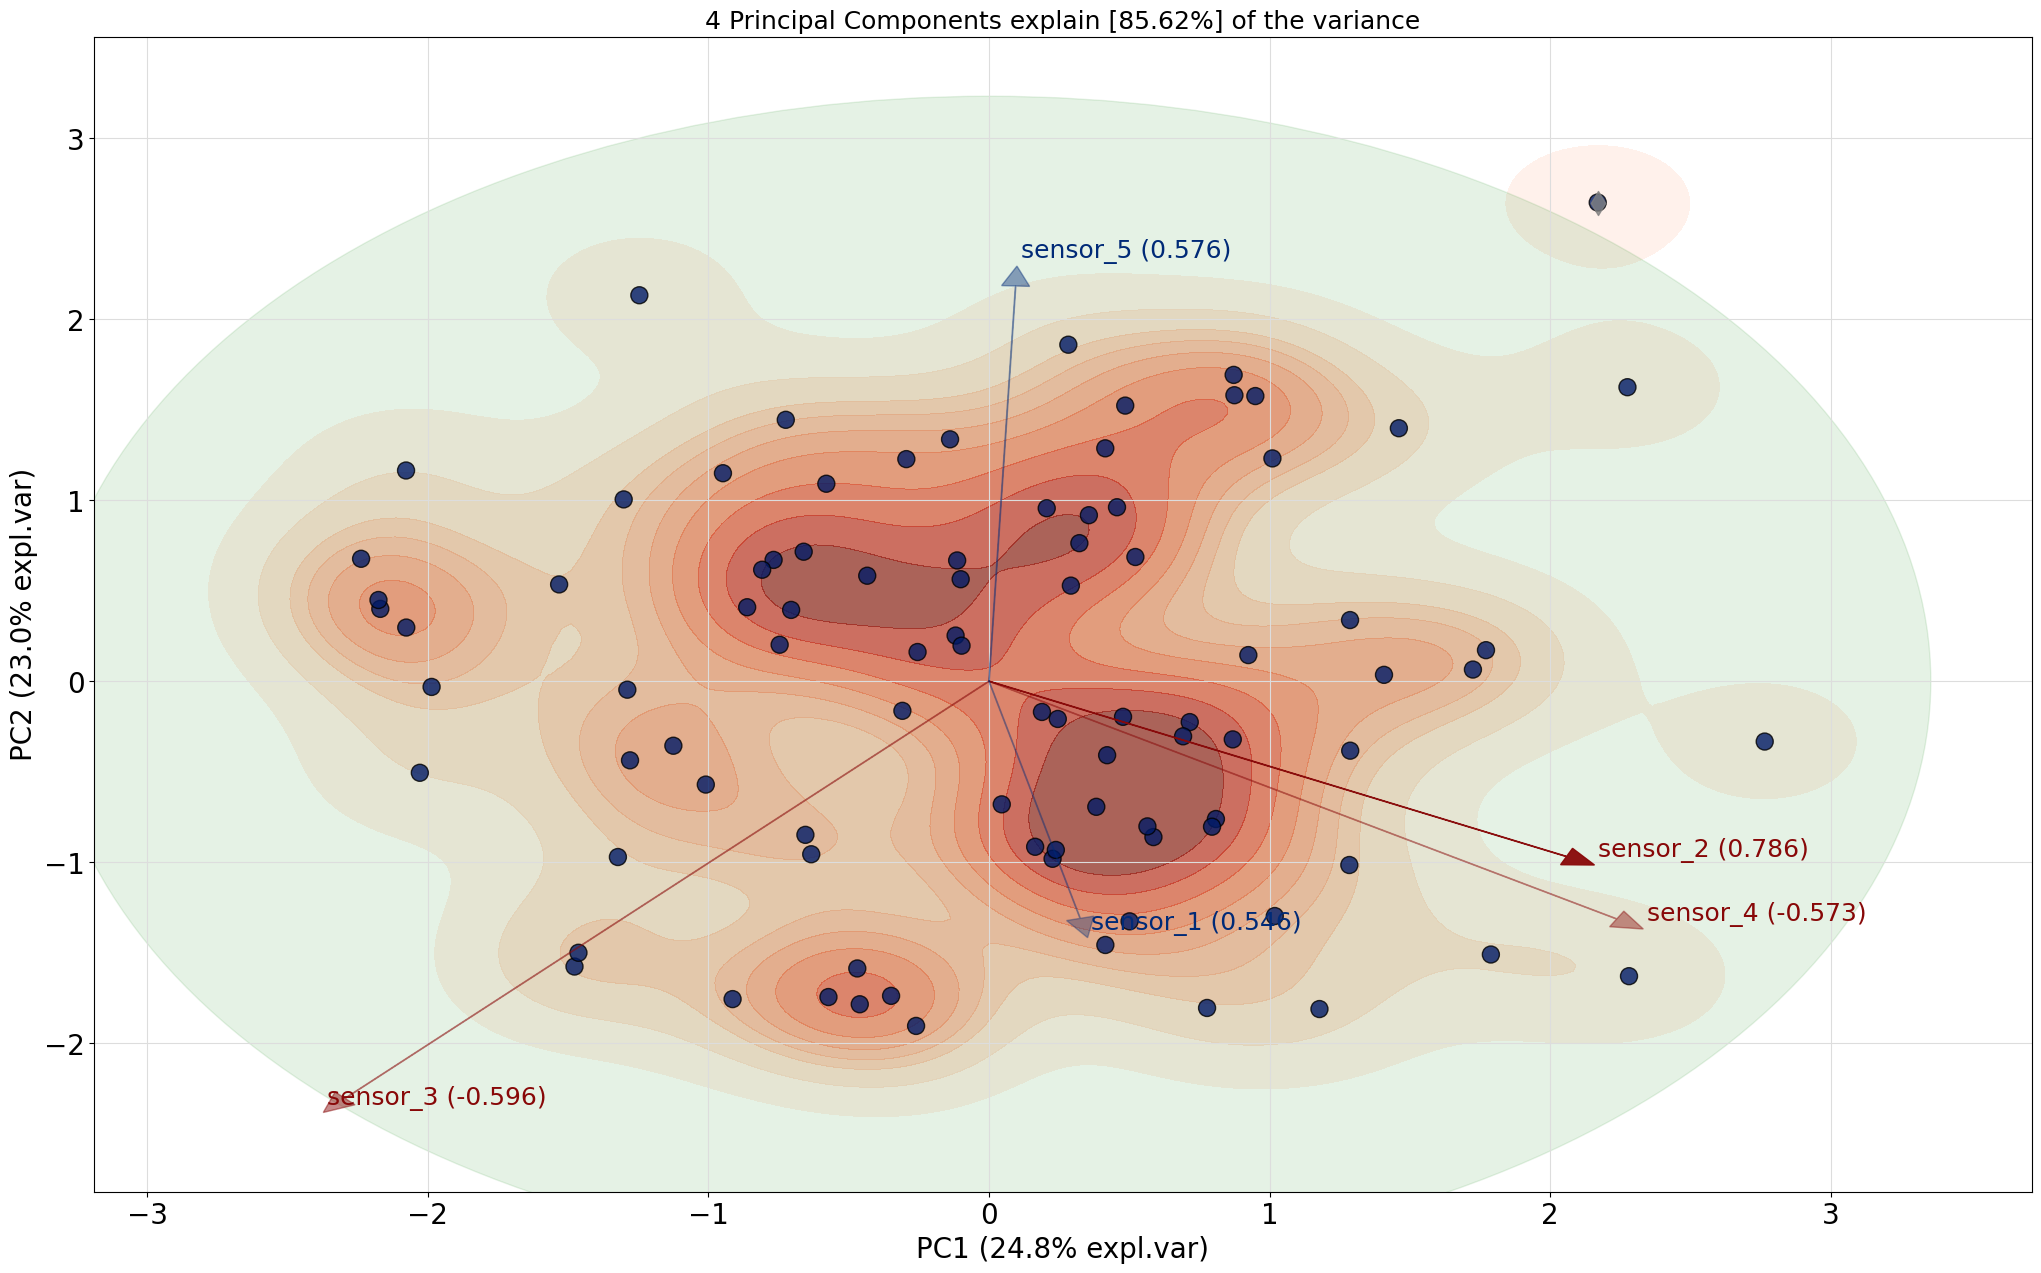

In [18]:
model.biplot(SPE=True, HT2=True, density=True)

[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '4 Principal Components explain [85.62%] of the variance'}, xlabel='PC1 (24.8% expl.var)', ylabel='PC2 (23.0% expl.var)', zlabel='PC3 (21.4% expl.var)'>)

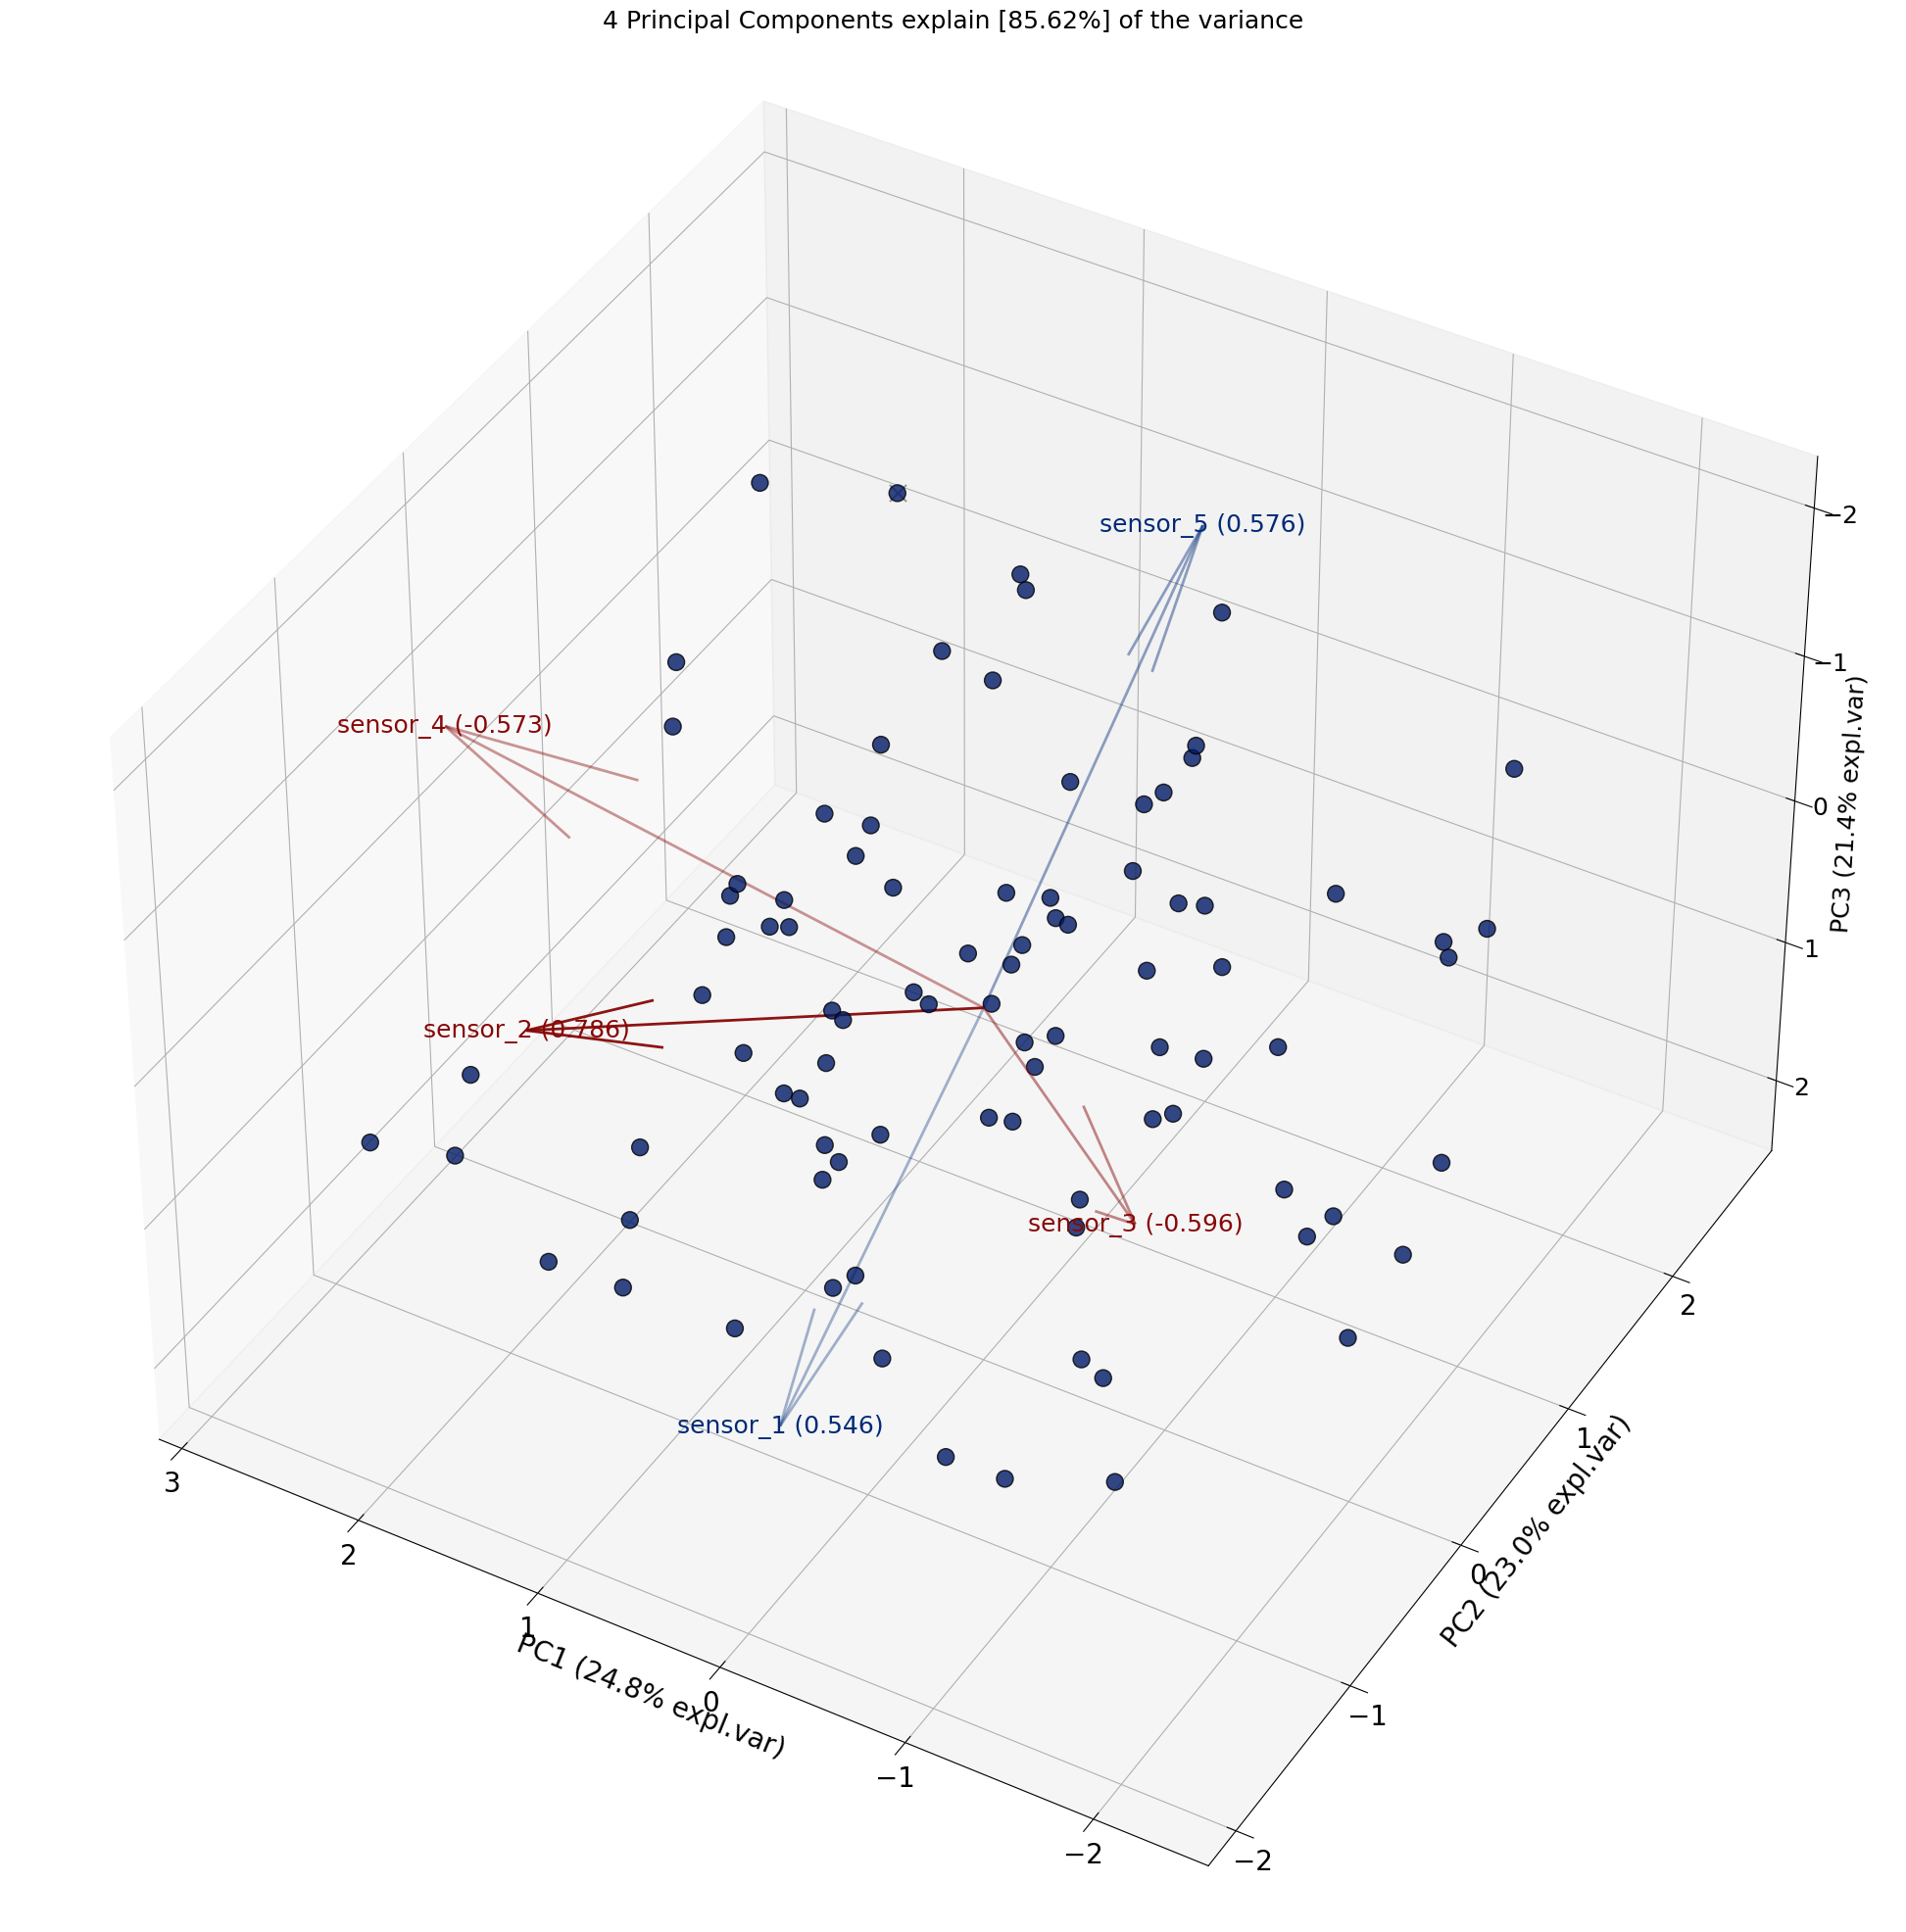

In [24]:
model.biplot3d(SPE=True, HT2=True) 

In [13]:
# 对测试集进行预测和异常判定
trans_res = model.transform(df_test)
trans_res

,PC1,PC2,PC3,PC4
mapped,1.771478,0.300087,0.557725,-0.743514
mapped,1.896511,0.120497,-2.061421,-0.296839
mapped,0.315090,0.603170,-0.478060,-0.446259
mapped,1.073832,0.283873,-0.122993,-2.038796
mapped,0.649297,-0.320819,-0.404695,-1.284850
mapped,1.200280,0.485475,1.628301,-0.443192
mapped,-0.055761,-1.279560,0.646697,-1.152057
mapped,0.288480,-0.540282,0.120509,0.028649
mapped,0.506272,-0.384054,1.725320,1.171853
mapped,0.857732,-0.264442,-0.459283,-0.484302


[scatterd] >INFO> Add density layer
[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [85.62%] of the variance'}, xlabel='PC1 (24.8% expl.var)', ylabel='PC2 (23.0% expl.var)'>)

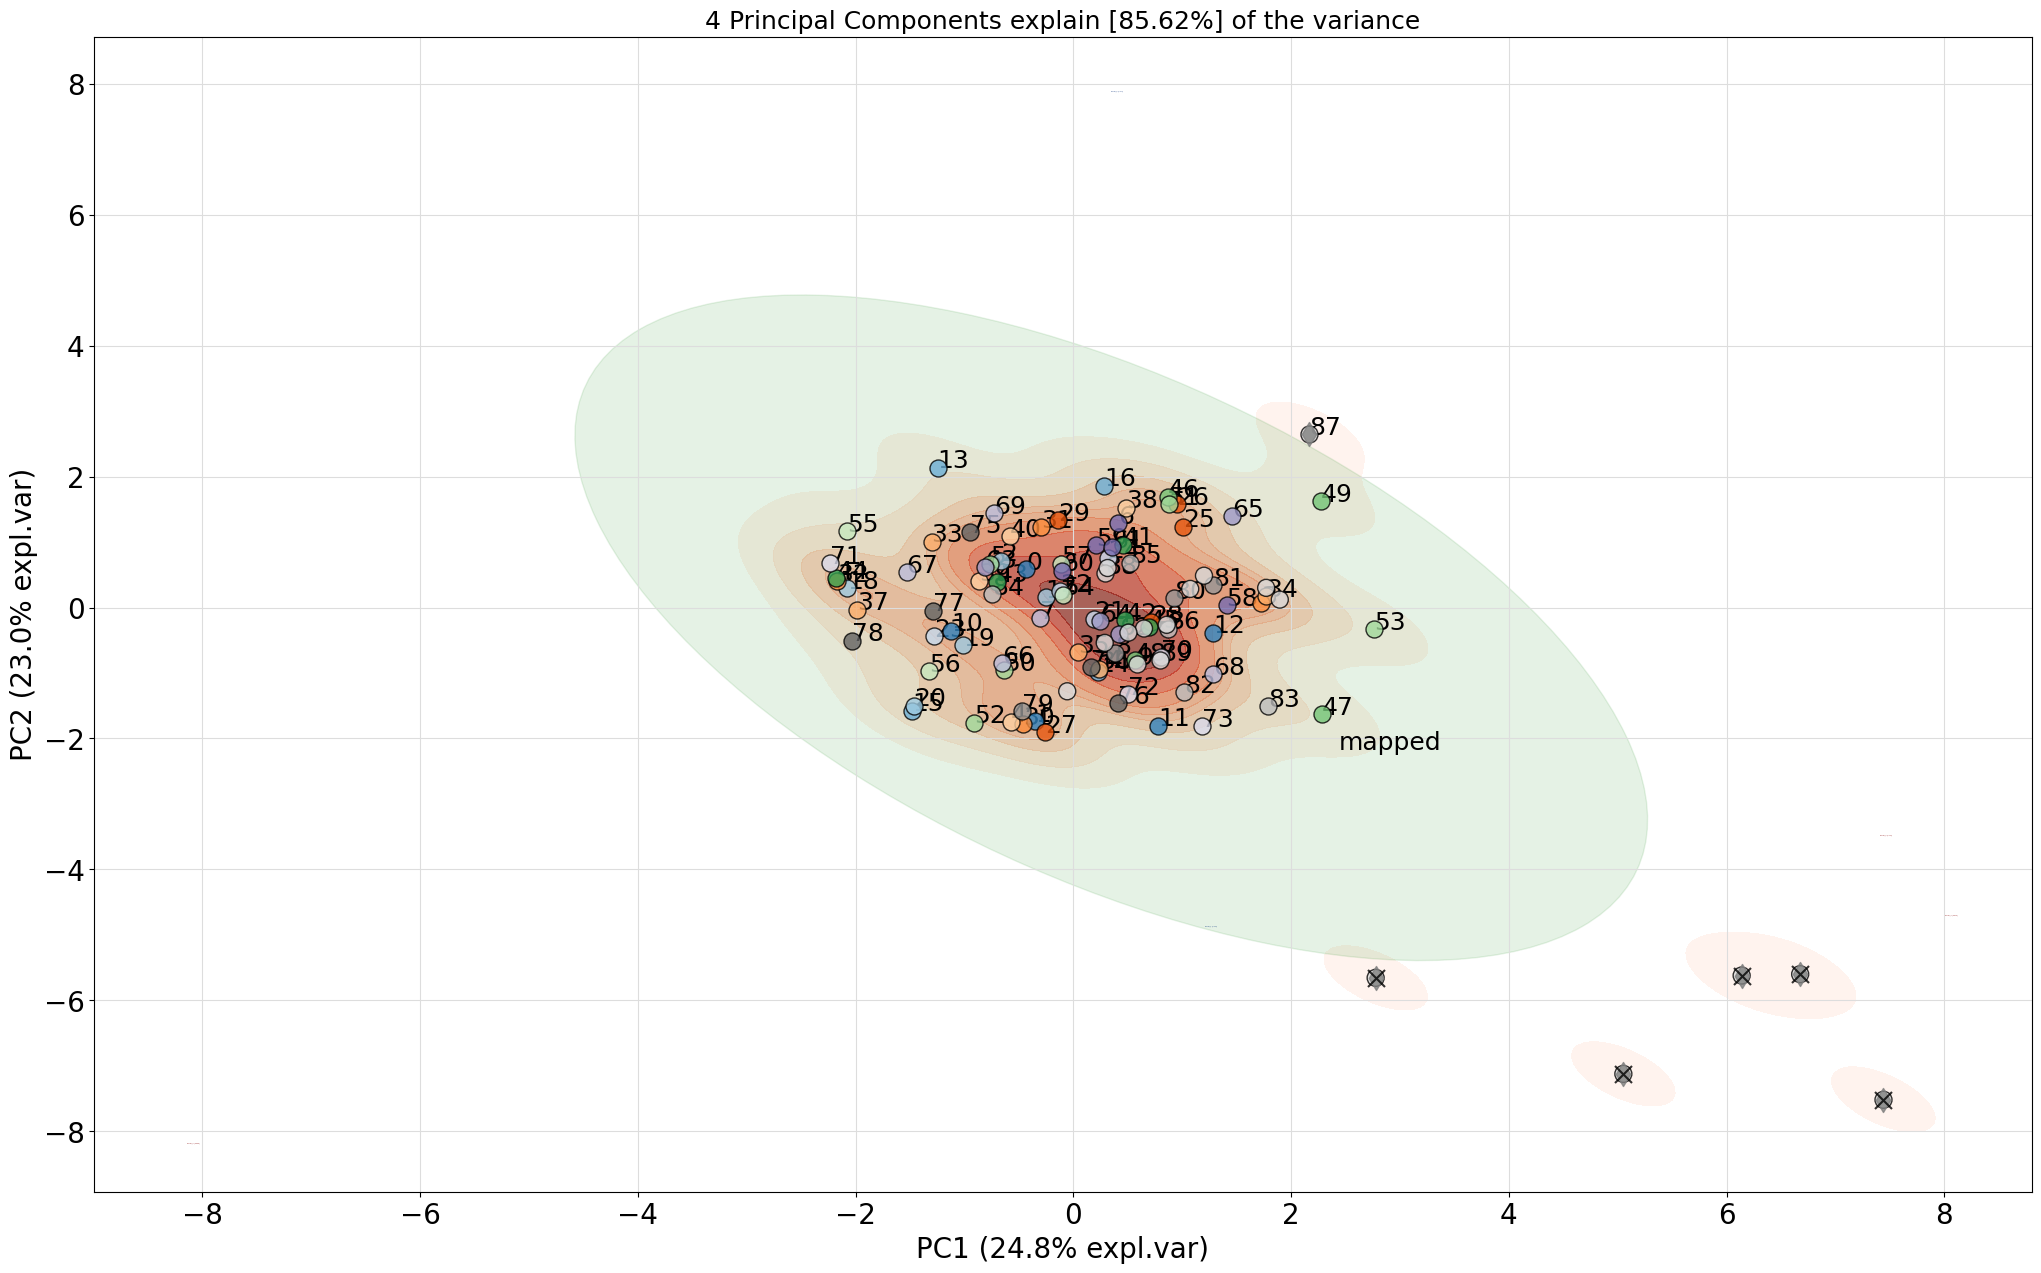

In [14]:
model.biplot(SPE=True, HT2=True, density=True,
             arrowdict={'fontsize': False, 'color_text': None, 'weight': False, 'alpha': False}) 

[scatterd] >INFO> Create scatterplot


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '4 Principal Components explain [85.62%] of the variance'}, xlabel='PC1 (24.8% expl.var)', ylabel='PC2 (23.0% expl.var)', zlabel='PC3 (21.4% expl.var)'>)

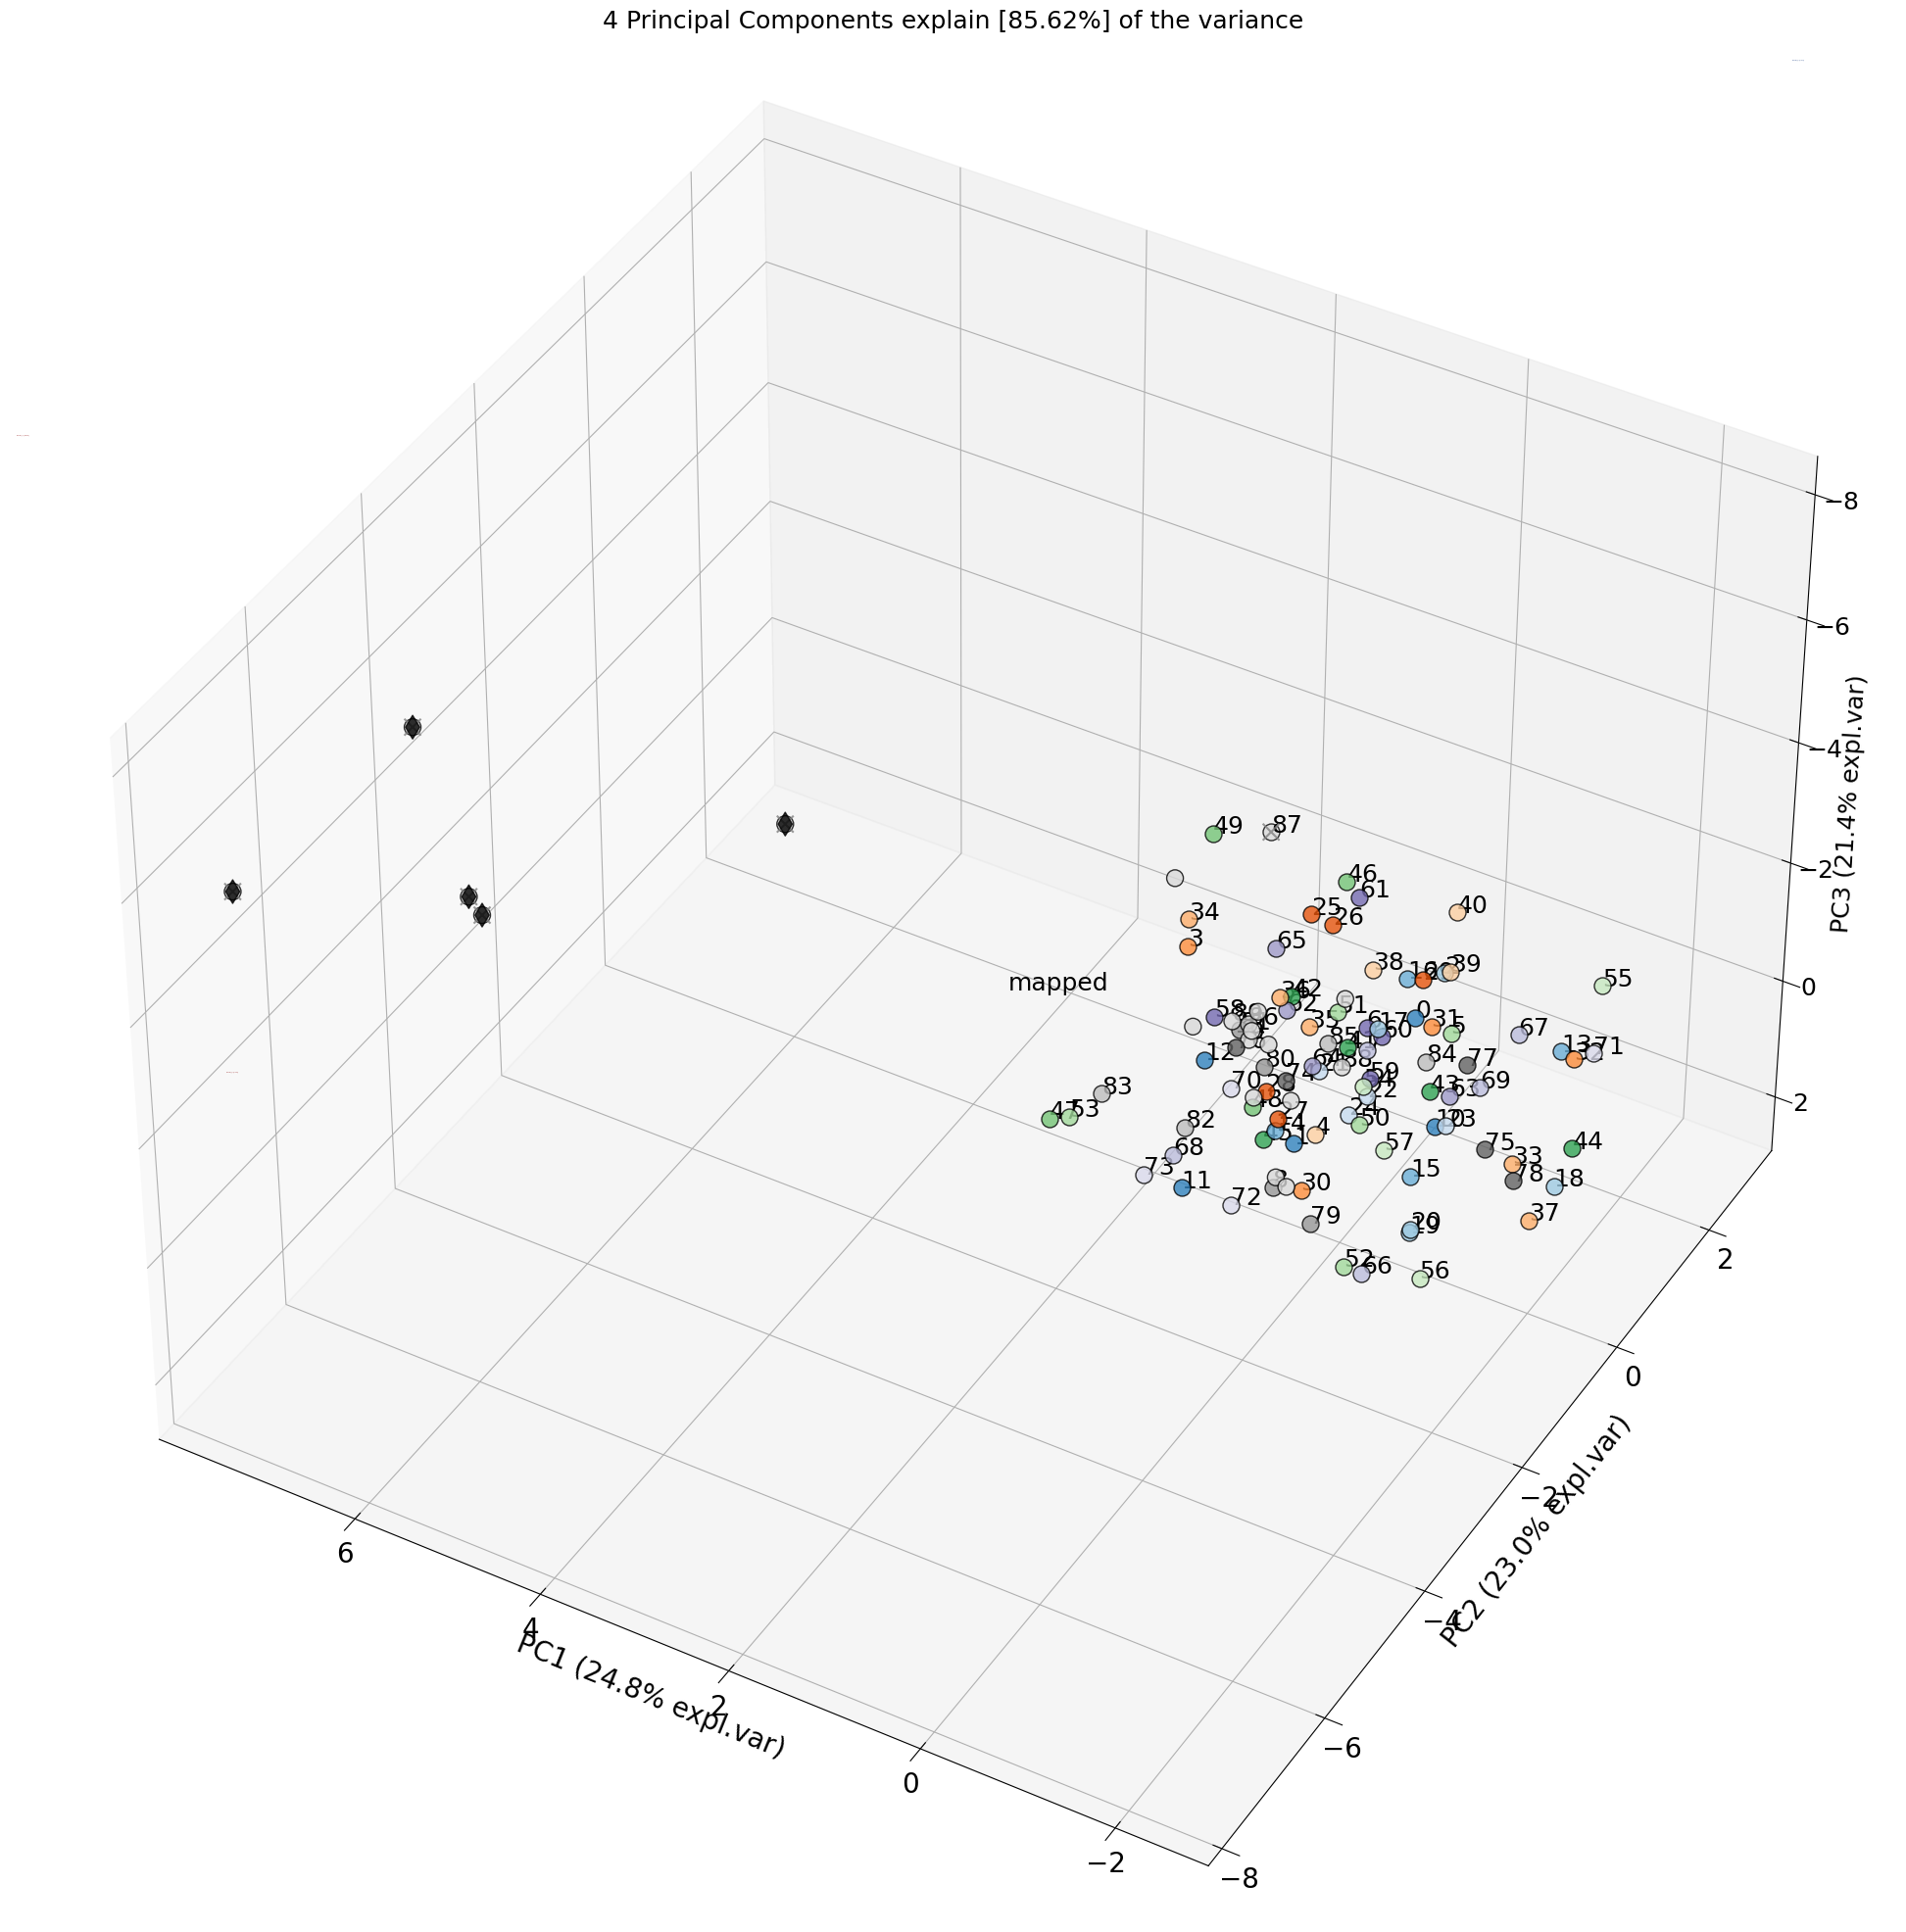

In [43]:
model.biplot3d(SPE=True, HT2=True, 
             arrowdict={'fontsize': False, 'color_text': None, 'weight': False, 'alpha': False}) 

In [15]:
results['outliers'].sort_values("y_score")[['y_proba','p_raw','y_score','y_bool']].tail(10)

,y_proba,p_raw,y_score,y_bool
27,9.969140e-01,4.106349e-01,8.237355,False
49,9.969140e-01,3.645824e-01,8.741358,False
53,9.969140e-01,3.288930e-01,9.161047,False
65,9.969140e-01,3.104346e-01,9.390464,False
87,9.969140e-01,2.518367e-01,10.191573,False
100,1.596702e-07,7.603344e-09,53.783728,True
102,1.462619e-07,5.571881e-09,54.479631,True
103,1.513086e-08,4.323102e-10,60.166593,True
104,3.172039e-10,6.041979e-12,69.549264,True
101,1.027086e-10,9.781767e-13,73.513953,True


In [16]:
results['outliers'].sort_values("y_score_spe")[['y_score_spe','y_bool_spe']].tail(10)

,y_score_spe,y_bool_spe
49,2.730326,False
71,2.767910,False
55,2.838821,False
13,2.916995,False
87,3.470975,True
100,5.871597,True
102,7.856987,True
104,8.248055,True
103,8.278952,True
101,10.113283,True


### 2.2 HT2(版本二：根据公式计算统计量值)

In [46]:
def calculate_t_limit(data, n_components, confidence=0.95):
    data = np.array(data)
    data_mean = np.mean(data, 0) 
    data_std = np.std(data, 0)    
    data_nor = (data - data_mean) / data_std
    X = np.cov(data_nor.T)
    # v是降维后的各主成分的方差值，pca.explained_variance_
    P, v, P_t = np.linalg.svd(X) 
    # 根据主成分个数n_components，在特征向量里获取前n_components列
    P_k = P[:, :n_components] 
#     print(v)
#     print(v[:n_components])

    v_I = np.diag(1 / v[:n_components])
    coe = n_components * (np.shape(data_nor)[0] - 1) * (np.shape(data_nor)[0] + 1) / (
                    (np.shape(data_nor)[0] - n_components) * np.shape(data_nor)[0])

    t_limit = coe * stats.f.ppf(confidence, n_components, (np.shape(data_nor)[0] - n_components))
    return data_mean, data_std, P_k, v_I, t_limit

In [47]:
def calculate_sample_t2_values(data, data_mean, data_std, P_k, v_I, t_limit):
    data = np.array(data)
    t2_values = []
    for data_in in data:
        test_data_nor = ((data_in - data_mean) / data_std).reshape(len(data_in), 1)
        t2_values.append(np.dot(np.dot((np.dot((np.dot(test_data_nor.T, P_k)), v_I)), P_k.T), test_data_nor)[0][0])
    
    res = pd.DataFrame({'HT2_statistic': t2_values,
                        'y_bool': t2_values >= t_limit})
    return res

In [48]:
data = np.array(pd.read_csv('X.csv', index_col=0))   # (105, 5)

# 划分训练集和测试集
df_train = data[:90, :]
df_test = data[90:, :]

In [50]:
model = pca(alpha=0.05, verbose=2, n_components=4)
results = model.fit_transform(df_train)
results

{'loadings':             1         2         3         4         5
 PC1  0.088244  0.541901 -0.595816  0.585606  0.025011
 PC2 -0.355909 -0.255025 -0.598464 -0.343879  0.576089
 PC3  0.545523  0.071738 -0.434678 -0.572708 -0.424640
 PC4 -0.342685  0.785840  0.217231 -0.458304  0.088265,
 'PC':          PC1       PC2       PC3       PC4
 0  -0.434000  0.583013 -0.623139 -0.564167
 1  -0.349000 -1.738678 -0.724620 -0.482995
 2  -0.660468  0.715681 -1.377925  0.292915
 3   1.724624  0.064497 -1.069966  0.247190
 4  -0.572175 -1.745240 -1.024880  0.557037
 ..       ...       ...       ...       ...
 85  0.521665  0.686491  0.491907 -1.820739
 86  0.868754 -0.321443 -0.620704 -0.723544
 87  2.169411  2.645331 -0.309904 -1.146228
 88  0.291717  0.528238  0.593641  0.163318
 89  0.794843 -0.803902 -1.194903 -1.657415
 
 [90 rows x 4 columns],
 'explained_var': array([0.24847369, 0.47893452, 0.69350814, 0.85625448]),
 'variance_ratio': array([0.24847369, 0.23046082, 0.21457362, 0.16274635]),
 

In [51]:
data_mean, data_std, P_k, v_I, t_limit = calculate_t_limit(df_train, n_components=4, confidence=0.95)
t_limit

10.370653415998904

In [52]:
df_train_t2 = calculate_sample_t2_values(df_train, data_mean, data_std, P_k, v_I, t_limit)
df_train_t2.sort_values("HT2_statistic")

,HT2_statistic,y_bool
22,0.496455,False
43,0.626643,False
88,0.654903,False
17,0.929214,False
7,0.980588,False
...,...,...
78,8.809754,False
15,8.841396,False
27,10.081019,False
53,10.261114,False


In [53]:
df_test_t2 = calculate_sample_t2_values(df_test, data_mean, data_std, P_k, v_I, t_limit)
df_test_t2.sort_values("HT2_statistic")

,HT2_statistic,y_bool
2,0.554538,False
7,0.676563,False
4,1.097612,False
9,1.781106,False
0,2.202306,False
6,3.484063,False
8,4.082019,False
5,4.211131,False
3,4.836875,False
1,6.719810,False


### 2.3 SPE

In [56]:
##SPE统计量阈值计算
def calculate_spe_limit(data, n_components, confidence=0.95):
    data = np.array(data)
    data_mean = np.mean(data, 0) 
    data_std = np.std(data, 0)    
    data_nor = (data - data_mean) / data_std
    X = np.cov(data_nor.T)
    # v是降维后的各主成分的方差值，pca.explained_variance_
    P, v, P_t = np.linalg.svd(X) 
    # 根据主成分个数n_components，在特征向量里获取前n_components列
    P_k = P[:, :n_components]    

    theta1 = np.sum((v[n_components:]) ** 1)
    theta2 = np.sum((v[n_components:]) ** 2)
    theta3 = np.sum((v[n_components:]) ** 3)
    h0 = 1 - (2 * theta1 * theta3) / (3 * (theta2 ** 2))

    c_alpha = stats.norm.ppf(confidence)
    spe_limit = theta1 * (( (h0 * c_alpha * ((2 * theta2) ** 0.5) / theta1) + 
                           1 + 
                           (theta2 * h0 * (h0 - 1)/(theta1 ** 2) ) ) ** (1 / h0))
    return data_mean, data_std, P_k, spe_limit

In [57]:
def calculate_sample_spe_values(data, data_mean, data_std, P_k, spe_limit):
    data = np.array(data)
    spe_values = [] 
    for data_in in data:
        test_data_nor = ((data_in - data_mean) / data_std)
        I = np.eye(len(data_in))
        spe_values.append(np.dot(np.dot(test_data_nor.reshape(1, -1), 
                                  I - np.dot(P_k, P_k.T)), 
                           test_data_nor.reshape(-1, 1))[0][0]) 
        
    res = pd.DataFrame({'SPE_statistic': spe_values,
                        'y_bool': spe_values >= spe_limit})
    return res

In [58]:
data = pd.read_csv('X.csv', index_col=0)   # (105, 5)
data.columns =['sensor_'+str(i+1) for i in range(data.shape[1])]


# 划分训练集和测试集
df_train = data.iloc[:90, :]
df_test = data.iloc[90:, :]

In [59]:
model = pca(alpha=0.05, verbose=2, n_components=4)
results = model.fit_transform(df_train)
results

{'loadings':      sensor_1  sensor_2  sensor_3  sensor_4  sensor_5
 PC1  0.088244  0.541901 -0.595816  0.585606  0.025011
 PC2 -0.355909 -0.255025 -0.598464 -0.343879  0.576089
 PC3  0.545523  0.071738 -0.434678 -0.572708 -0.424640
 PC4 -0.342685  0.785840  0.217231 -0.458304  0.088265,
 'PC':          PC1       PC2       PC3       PC4
 0  -0.434000  0.583013 -0.623139 -0.564167
 1  -0.349000 -1.738678 -0.724620 -0.482995
 2  -0.660468  0.715681 -1.377925  0.292915
 3   1.724624  0.064497 -1.069966  0.247190
 4  -0.572175 -1.745240 -1.024880  0.557037
 ..       ...       ...       ...       ...
 85  0.521665  0.686491  0.491907 -1.820739
 86  0.868754 -0.321443 -0.620704 -0.723544
 87  2.169411  2.645331 -0.309904 -1.146228
 88  0.291717  0.528238  0.593641  0.163318
 89  0.794843 -0.803902 -1.194903 -1.657415
 
 [90 rows x 4 columns],
 'explained_var': array([0.24847369, 0.47893452, 0.69350814, 0.85625448]),
 'variance_ratio': array([0.24847369, 0.23046082, 0.21457362, 0.16274635]),
 

In [60]:
data_mean, data_std, P_k, spe_limit = calculate_spe_limit(df_train, n_components=4)
spe_limit

2.903497966626367

In [61]:
df_train_spe = calculate_sample_spe_values(df_train, data_mean, data_std, P_k, spe_limit)
df_train_spe.sort_values("SPE_statistic").tail(10)

,SPE_statistic,y_bool
29,2.368321,False
59,2.466599,False
65,2.653497,False
68,2.655072,False
77,3.331526,True
36,4.065678,True
0,4.132208,True
13,4.489441,True
86,4.907038,True
87,5.793134,True


In [62]:
df_test_spe = calculate_sample_spe_values(df_test, data_mean, data_std, P_k, spe_limit)
df_test_spe.sort_values("SPE_statistic")

,SPE_statistic,y_bool
5,0.002790,False
6,0.013572,False
9,0.577645,False
3,1.000964,False
1,1.306458,False
7,1.715492,False
0,2.545779,False
2,2.618965,False
8,2.645130,False
4,3.564060,True
